<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/ANN_regression/remove_Mn_tensorflow_jun_28_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import tensorflow as tf
from tensorflow.keras.layers import   Activation, add,  Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D, axes3d
%matplotlib inline

In [2]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [3]:
df=pd.read_excel("remove_Mn.xlsx")
print(df.head())

    tipo  D2EHPA  time  H2SO4  NaCl  EDTA    Mn
0  train    0.08     4    0.4     8    12   6.0
1  train    0.16     4    0.4     8     4  20.0
2  train    0.08     8    0.4     8     4  13.0
3  train    0.16     8    0.4     8    12   7.0
4   test    0.08     4    0.8     8     4  25.0


In [4]:
norm_df = df.drop(['tipo'],axis=1)
norm_df =(norm_df -norm_df.mean())/norm_df.std()

In [5]:
norm_df

,D2EHPA,time,H2SO4,NaCl,EDTA,Mn
0,-1.143544e+00,-1.143544,-1.143544e+00,-1.143544,1.181834,-0.421988
1,1.143544e+00,-1.143544,-1.143544e+00,-1.143544,-1.251353,1.734153
2,-1.143544e+00,1.143544,-1.143544e+00,-1.143544,-1.251353,0.656083
3,1.143544e+00,1.143544,-1.143544e+00,-1.143544,1.181834,-0.267978
4,-1.143544e+00,-1.143544,1.143544e+00,-1.143544,-1.251353,2.504204
5,1.143544e+00,-1.143544,1.143544e+00,-1.143544,1.181834,0.656083
6,-1.143544e+00,1.143544,1.143544e+00,-1.143544,1.181834,-1.346048
7,1.143544e+00,1.143544,1.143544e+00,-1.143544,-1.251353,0.348063
8,-1.143544e+00,-1.143544,-1.143544e+00,1.143544,-1.251353,-0.421988
9,1.143544e+00,-1.143544,-1.143544e+00,1.143544,1.181834,-1.346048


In [6]:
df

,tipo,D2EHPA,time,H2SO4,NaCl,EDTA,Mn
0,train,0.08,4,0.4,8,12,6.0
1,train,0.16,4,0.4,8,4,20.0
2,train,0.08,8,0.4,8,4,13.0
3,train,0.16,8,0.4,8,12,7.0
4,test,0.08,4,0.8,8,4,25.0
5,train,0.16,4,0.8,8,12,13.0
6,train,0.08,8,0.8,8,12,0.0
7,train,0.16,8,0.8,8,4,11.0
8,train,0.08,4,0.4,24,4,6.0
9,test,0.16,4,0.4,24,12,0.0


In [7]:
train = norm_df[df.tipo != 'test'] # exluding cases with zero in volume
train.shape

(31, 6)

In [8]:
test = norm_df[df.tipo == 'test'] # exluding cases with zero in volume
test.shape

(4, 6)

In [9]:
x_train = train.drop(["Mn"],axis=1)
x_test = test.drop(["Mn"],axis=1)
y_train = train['Mn']
y_test = test['Mn']

In [10]:
# define a rede neural
N_Hidden=11
model = Sequential()
model.add(Dense(5, activation='linear'))
model.add(Dense(N_Hidden, activation='tanh'))
model.add(Dense(1, activation='linear'))


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')


In [12]:
r = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    epochs= 1000,
    verbose=2
)

Epoch 1/1000
1/1 - 3s - loss: 0.6621 - val_loss: 0.8909 - 3s/epoch - 3s/step
Epoch 2/1000
1/1 - 0s - loss: 0.6595 - val_loss: 0.8838 - 56ms/epoch - 56ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.6569 - val_loss: 0.8766 - 74ms/epoch - 74ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.6542 - val_loss: 0.8694 - 45ms/epoch - 45ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.6516 - val_loss: 0.8622 - 43ms/epoch - 43ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.6490 - val_loss: 0.8550 - 126ms/epoch - 126ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.6463 - val_loss: 0.8477 - 58ms/epoch - 58ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.6436 - val_loss: 0.8403 - 52ms/epoch - 52ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.6410 - val_loss: 0.8330 - 42ms/epoch - 42ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.6383 - val_loss: 0.8255 - 111ms/epoch - 111ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.6356 - val_loss: 0.8180 - 124ms/epoch - 124ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.6334 - val_loss: 0.8113 - 42ms/epoch - 42ms/step
Epoch 13/1000
1/1 - 0s 

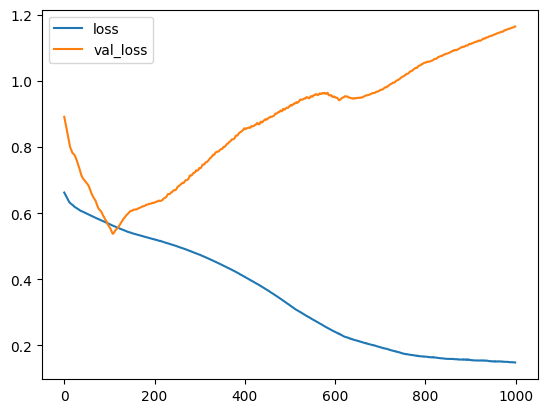

In [13]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [14]:
# treina a rede neural
model.fit(x_train, y_train)

1/1 [==============================] - 0s 12ms/step - loss: 0.1483


In [15]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)
print('r2_score test',r2_score(y_train,y_calc_train),'r2_score test',r2_score(y_test,y_calc_test))

1/1 [==============================] - 0s 27ms/step
r2_score test 0.8510039966275502 r2_score test 0.13941547938899124


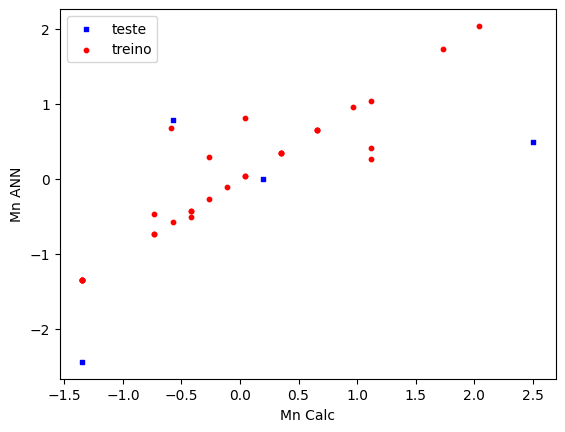

In [16]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Mn ANN')
plt.xlabel('Mn Calc')
plt.show()

In [17]:
def function(x,model= model):
  x=x.reshape((1, 5))
  df = pd.DataFrame(x)
  Y=model.predict(df)
  fun=Y*(-1)
  return fun


In [ ]:
#bounds = [(-2, 2),(-2, 2),(-2, 2),(-2, 2),(-2, 2)]
bounds = [(-1.2, 1.2)]*5
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, 5))


1/1 [==============================] - ETA: 0s

In [ ]:
print(Condicoes)

In [ ]:
resp_opt=model.predict(Condicoes)

In [ ]:
Condicoes['Mn'] = resp_opt[0]


In [ ]:
df = df.drop(['tipo'],axis=1)
Condicoes.columns = df.columns

In [ ]:
Condicoes = Condicoes*df.std()+df.mean()

In [ ]:
Condicoes